In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from os.path import expanduser
import seaborn as sns
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches

In [2]:
DETECTS_3DID_NAME = 'minvi-600-2021-12-19-02-35-34'
DETECTS_3DID_DIR = '/media/big-ssd/results-P3856_YHE211-3did/{}/P3856_YHE211/features-3did'.format(DETECTS_3DID_NAME)
DETECTS_3DID_FILE = '{}/exp-P3856_YHE211-run-P3856_YHE211_1_Slot1-1_1_5104-features-3did-dedup.feather'.format(DETECTS_3DID_DIR)

In [3]:
# load the 3DID features classified as identifiable
detects_3did_df = pd.read_feather(DETECTS_3DID_FILE)

In [4]:
detects_3did_df.sample(n=4)

,index,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,inverse_k0_apex,rt_apex,rt_lower,rt_upper,...,voxel_id,voxel_metadata_d,scan_df,scan_r_squared,rt_df,rt_r_squared,number_of_frames,feature_id,prediction,identification_predicted
22740,261,620.308777,620.348267,313.0,303.0,340.0,1.159055,238.524353,236.948654,242.351776,...,530000686,"{""mz_lower"": 620.3, ""mz_upper"": 620.4, ""scan_l...","[{""scan"":275,""inverse_k0"":1.1783072948,""intens...",0.991187,"[{""frame_id"":1885,""retention_time_secs"":225.39...",0.955973,12,82210,0.829580,True
32994,7582,643.294434,643.335449,299.0,289.0,309.0,1.166150,820.912170,818.287354,822.488220,...,550024117,"{""mz_lower"": 643.3, ""mz_upper"": 643.4, ""scan_l...","[{""scan"":259,""inverse_k0"":1.1864081621,""intens...",0.834516,"[{""frame_id"":7450,""retention_time_secs"":810.40...",0.792789,9,114665,0.401907,True
65839,353,732.379028,732.425720,125.0,98.0,157.0,1.254132,1651.501221,1649.385498,1653.619629,...,640001334,"{""mz_lower"": 732.4, ""mz_upper"": 732.5, ""scan_l...","[{""scan"":89,""inverse_k0"":1.2722892761,""intensi...",0.958948,"[{""frame_id"":14522,""retention_time_secs"":1640....",0.980675,9,225643,0.926069,True
38397,443,669.835205,669.877869,729.0,719.0,754.0,0.947148,917.557495,912.557495,922.557495,...,570001168,"{""mz_lower"": 669.8000000000001, ""mz_upper"": 66...","[{""scan"":697,""inverse_k0"":0.9635238647,""intens...",0.957288,"[{""frame_id"":8435,""retention_time_secs"":913.88...",0.814569,17,134924,0.863641,True


In [5]:
detects_3did_df.loc[detects_3did_df.scan_apex.idxmax()][['scan_apex','inverse_k0_apex']]

scan_apex             916.0
inverse_k0_apex    0.851201
Name: 1, dtype: object

In [6]:
detects_3did_df.loc[detects_3did_df.scan_apex.idxmin()][['scan_apex','inverse_k0_apex']]

scan_apex              49.0
inverse_k0_apex    1.292446
Name: 86728, dtype: object

In [7]:
(1.292446-0.851201)/(916-49)*20

0.010178662053056517

In [8]:
detects_3did_df.columns

Index(['index', 'mono_mz_lower', 'mono_mz_upper', 'scan_apex', 'scan_lower',
       'scan_upper', 'inverse_k0_apex', 'rt_apex', 'rt_lower', 'rt_upper',
       'intensity_without_saturation_correction',
       'intensity_with_saturation_correction',
       'mono_intensity_adjustment_outcome', 'isotopic_peaks', 'isotope_count',
       'envelope', 'coelution_coefficient', 'mobility_coefficient',
       'voxels_processed', 'monoisotopic_mz', 'charge', 'neutral_mass',
       'monoisotopic_mass', 'feature_intensity', 'deconvolution_envelope',
       'deconvolution_score', 'feature_region_3d_extent', 'voxel_id',
       'voxel_metadata_d', 'scan_df', 'scan_r_squared', 'rt_df',
       'rt_r_squared', 'number_of_frames', 'feature_id', 'prediction',
       'identification_predicted'],
      dtype='object')

In [9]:
biosaur_name = 'P3856_YHE211_1_Slot1-1_1_5104-denoised-biosaur-mini-200-ac-10-minl-3.features.tsv'

DETECTS_BIOSAUR_FILE = '{}/{}'.format(expanduser('~'), biosaur_name)

In [10]:
detects_biosaur_df = pd.read_csv(DETECTS_BIOSAUR_FILE, sep='\\t', engine='python')

In [11]:
detects_biosaur_df = detects_biosaur_df[(detects_biosaur_df.nIsotopes >= 3)]

In [12]:
detects_biosaur_df.loc[detects_biosaur_df.ion_mobility.idxmax()].ion_mobility

1.2853787977064846

In [13]:
detects_biosaur_df.columns

Index(['massCalib', 'rtApex', 'intensityApex', 'charge', 'nIsotopes', 'nScans',
       'sulfur', 'cos_corr_1', 'cos_corr_2', 'diff_for_output',
       'corr_fill_zero', 'intensity_1', 'scan_id_1', 'mz_std_1', 'intensity_2',
       'scan_id_2', 'mz_std_2', 'mz', 'rtStart', 'rtEnd', 'id', 'ion_mobility',
       'FAIMS', 'targeted_mode'],
      dtype='object')

In [14]:
# corresponds to about the same scan tolerance as 20 scans over 910
DUP_INVERSE_K0 = (detects_3did_df.inverse_k0_apex.max()-detects_3did_df.inverse_k0_apex.min())*(20/910) * 4
DUP_INVERSE_K0 = 0.05

In [15]:
# definition of a duplicate feature
DUP_MZ_TOLERANCE_PPM = 25
DUP_RT_TOLERANCE = 5

In [16]:
# set up dup definitions
MZ_TOLERANCE_PERCENT = DUP_MZ_TOLERANCE_PPM * 10**-4
detects_biosaur_df['dup_mz_ppm_tolerance'] = detects_biosaur_df.mz * MZ_TOLERANCE_PERCENT / 100
detects_biosaur_df['dup_mz_lower'] = detects_biosaur_df.mz - detects_biosaur_df.dup_mz_ppm_tolerance
detects_biosaur_df['dup_mz_upper'] = detects_biosaur_df.mz + detects_biosaur_df.dup_mz_ppm_tolerance
detects_biosaur_df['dup_inverse_k0_lower'] = detects_biosaur_df.ion_mobility - DUP_INVERSE_K0
detects_biosaur_df['dup_inverse_k0_upper'] = detects_biosaur_df.ion_mobility + DUP_INVERSE_K0
detects_biosaur_df['dup_rt_lower'] = detects_biosaur_df.rtApex - DUP_RT_TOLERANCE
detects_biosaur_df['dup_rt_upper'] = detects_biosaur_df.rtApex + DUP_RT_TOLERANCE

In [17]:
# find the features detected by 3DID and Biosaur
matched_features_3did = set()
matched_features_biosaur = set()

for row in detects_3did_df.itertuples():
    df = detects_biosaur_df[(row.charge == detects_biosaur_df.charge) & (row.monoisotopic_mz >= detects_biosaur_df.dup_mz_lower) & (row.monoisotopic_mz <= detects_biosaur_df.dup_mz_upper) & (row.inverse_k0_apex >= detects_biosaur_df.dup_inverse_k0_lower) & (row.inverse_k0_apex <= detects_biosaur_df.dup_inverse_k0_upper) & (row.rt_apex >= detects_biosaur_df.dup_rt_lower) & (row.rt_apex <= detects_biosaur_df.dup_rt_upper)]
    if len(df) > 0:
        matched_features_3did.update(set([row.feature_id]))
        matched_features_biosaur.update(set(df.id.tolist()))

In [18]:
contained_in_3did_not_biosaur = len(detects_3did_df) - len(matched_features_3did)
contained_in_biosaur_not_3did = len(detects_biosaur_df) - len(matched_features_biosaur)
contained_in_both = len(matched_features_biosaur)

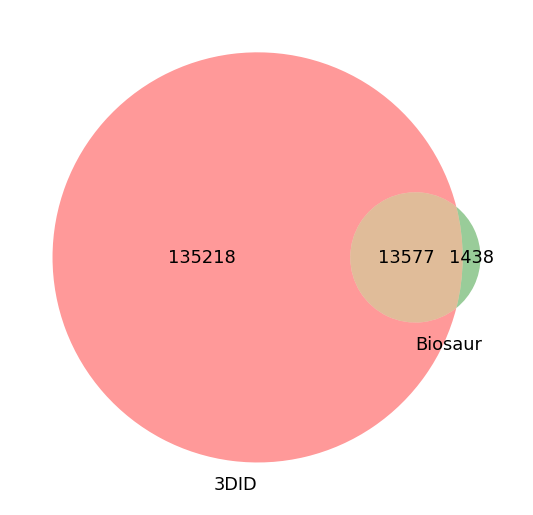

In [34]:
f, ax = plt.subplots()
f.set_figheight(4)
f.set_figwidth(7.5)
f.set_dpi(160)

plt.margins(0.06)

v = venn2(subsets = (contained_in_3did_not_biosaur, contained_in_biosaur_not_3did, contained_in_both), set_labels = ('3DID', 'Biosaur'))
for text in v.subset_labels:
    text.set_fontsize(8)
for text in v.set_labels:
    text.set_fontsize(8)

plt.show()

In [30]:
f.savefig('{}/3did-figure-7a.tiff'.format(expanduser('~')), dpi=600, bbox_inches='tight')

In [20]:
matched_3did_df = detects_3did_df[detects_3did_df.feature_id.isin(matched_features_3did)]

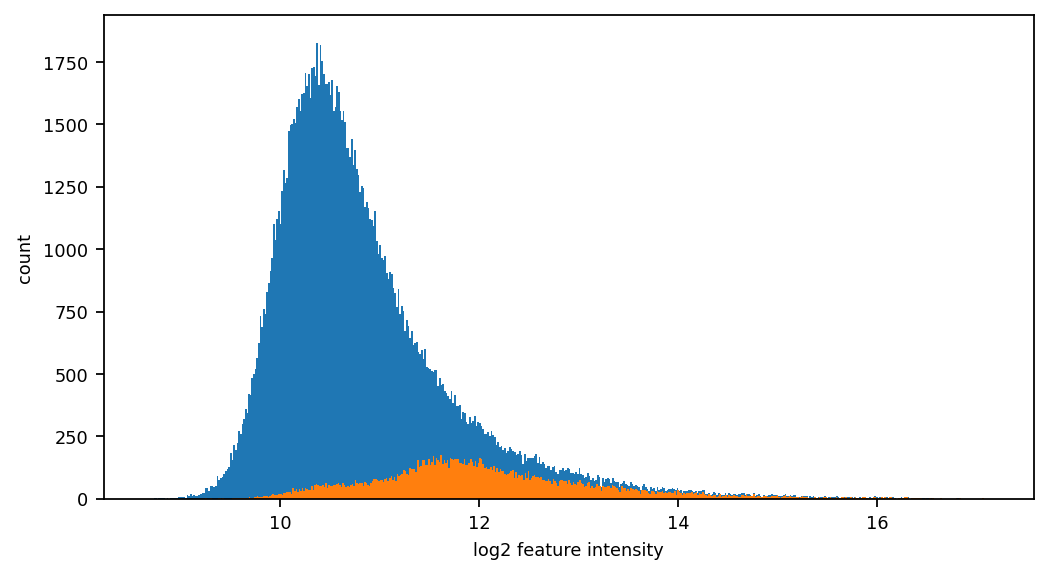

In [35]:
f, ax = plt.subplots()
f.set_figheight(4)
f.set_figwidth(7.5)
f.set_dpi(160)

plt.margins(0.06)

bins = 500
values = np.log2(detects_3did_df.feature_intensity)
y, x, _ = ax.hist(values, bins=bins, label='detected')

values = np.log2(matched_3did_df.feature_intensity)
y, x, _ = ax.hist(values, bins=bins, label='matched')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax.set_xlabel('log2 feature intensity', fontsize=8)
ax.set_ylabel('count', fontsize=8)

plt.show()

In [33]:
f.savefig('{}/3did-figure-7b.tiff'.format(expanduser('~')), dpi=600, bbox_inches='tight')

In [22]:
biosaur_only_df = detects_biosaur_df[~detects_biosaur_df.id.isin(matched_features_biosaur)]

In [23]:
biosaur_only_df.sample(n=5)

,massCalib,rtApex,intensityApex,charge,nIsotopes,nScans,sulfur,cos_corr_1,cos_corr_2,diff_for_output,...,ion_mobility,FAIMS,targeted_mode,dup_mz_ppm_tolerance,dup_mz_lower,dup_mz_upper,dup_inverse_k0_lower,dup_inverse_k0_upper,dup_rt_lower,dup_rt_upper
12432,1769.946154,2115.654066,4326.0,2,3,4,0,0.976931,1.0,-7.094590e-07,...,1.135805,0,[],0.022150,885.958204,886.002503,1.085805,1.185805,2110.654066,2120.654066
5726,1894.921087,2170.697470,177801.0,2,4,10,0,0.954670,1.0,-1.248833e-06,...,1.253856,0,[],0.023712,948.444108,948.491532,1.203856,1.303856,2165.697470,2175.697470
12023,1336.722758,2309.358192,113252.0,2,3,9,0,0.981556,1.0,-1.248226e-07,...,0.969673,0,[],0.016734,669.351921,669.385390,0.919673,1.019673,2304.358192,2314.358192
5841,2645.231242,1748.891074,5229.0,3,4,9,0,0.937117,1.0,2.850102e-06,...,0.932150,0,[],0.022069,882.728955,882.773092,0.882150,0.982150,1743.891074,1753.891074
8914,2141.996291,2025.685979,1326.0,2,3,3,0,0.995566,1.0,-2.084479e-06,...,1.224340,0,[],0.026800,1071.978622,1072.032222,1.174340,1.274340,2020.685979,2030.685979


In [24]:
biosaur_only_df.mz.max()

1661.4332582544544

In [25]:
detects_3did_df.charge.min()

1

In [26]:
matched_biosaur_df = detects_biosaur_df[detects_biosaur_df.id.isin(matched_features_biosaur)]

In [27]:
matched_biosaur_df.intensityApex.mean()

22458.023790233485

In [28]:
biosaur_only_df.intensityApex.max()

660029.0